In [4]:
# library 

import os

from numba import cuda 

import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import genfromtxt
from matplotlib import *
import matplotlib.pyplot as plt
import h5py
import math
import scipy
from scipy import ndimage
import sklearn
import seaborn as sns

import tensorflow as tf
from tensorflow import *
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.utils import to_categorical
from keras.callbacks import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split


import skimage
from skimage import * 
%matplotlib inline


np.random.seed(1) # set a seed so that the results are consistent

<h3>Model optimizing with different learning rate (α) </h3>

In [5]:
# data

titanic_df = pd.read_csv( 'datasets/titanic_survivor.csv' ); titanic_df.columns
X = np.array( titanic_df.drop( ['survived'], axis= 1 ), dtype= 'float32' )
# converting Y survived/not-survived into one hot encoder
Y = keras.utils.to_categorical( titanic_df[['survived']], dtype= 'float32' )

In [6]:
# get model function

def get_model(ip_shp):
    kSeqModel = keras.Sequential()
    
    kSeqModel.add( Dense( 100, activation= 'relu', input_shape= (ip_shp,) ) )
    kSeqModel.add( Dense( 100, activation= 'relu' ) )
    kSeqModel.add( Dense( 2, activation= 'softmax' ) )
    
    return(kSeqModel)

In [7]:
# loop for running the model with different learning rate

learning_rates = [1, 0.01, 0.000001]

for each_lr in learning_rates:
    print( '\n\nTesting model with learning rate: %f\n'%each_lr )
    keras.backend.clear_session()
    
    no_features = X.shape[1]
    model_current = get_model( no_features )
    model_current.compile( 
                            optimizer= keras.optimizers.SGD(lr=each_lr),
                            loss= 'categorical_crossentropy'
                         )
    model_current.fit( x= X, y= Y,
                       verbose= 2, epochs= 10
                     )
    print('-----------------------------------------------------------------------------------------')



Testing model with learning rate: 1.000000

Epoch 1/10
28/28 - 0s - loss: 130922.0234
Epoch 2/10
28/28 - 0s - loss: 0.6704
Epoch 3/10
28/28 - 0s - loss: 0.6689
Epoch 4/10
28/28 - 0s - loss: 0.6673
Epoch 5/10
28/28 - 0s - loss: 0.6716
Epoch 6/10
28/28 - 0s - loss: 0.6731
Epoch 7/10
28/28 - 0s - loss: 0.6733
Epoch 8/10
28/28 - 0s - loss: 0.6685
Epoch 9/10
28/28 - 0s - loss: 0.6748
Epoch 10/10
28/28 - 0s - loss: 0.6672
-----------------------------------------------------------------------------------------


Testing model with learning rate: 0.010000

Epoch 1/10
28/28 - 0s - loss: 1.2911
Epoch 2/10
28/28 - 0s - loss: 0.6836
Epoch 3/10
28/28 - 0s - loss: 0.6368
Epoch 4/10
28/28 - 0s - loss: 0.6128
Epoch 5/10
28/28 - 0s - loss: 0.6131
Epoch 6/10
28/28 - 0s - loss: 0.5995
Epoch 7/10
28/28 - 0s - loss: 0.6019
Epoch 8/10
28/28 - 0s - loss: 0.5870
Epoch 9/10
28/28 - 0s - loss: 0.6093
Epoch 10/10
28/28 - 0s - loss: 0.6150
-----------------------------------------------------------------------

<h3>Model validation </h3>

 Model is learning.... 
Epoch 1/150
21/21 - 0s - loss: 0.8741 - accuracy: 0.6033 - val_loss: 0.6567 - val_accuracy: 0.7040
Epoch 2/150
21/21 - 0s - loss: 0.6812 - accuracy: 0.6617 - val_loss: 0.5648 - val_accuracy: 0.7175
Epoch 3/150
21/21 - 0s - loss: 0.5986 - accuracy: 0.6886 - val_loss: 0.4853 - val_accuracy: 0.7668
Epoch 4/150
21/21 - 0s - loss: 0.6183 - accuracy: 0.6722 - val_loss: 0.5042 - val_accuracy: 0.7668
Epoch 5/150
21/21 - 0s - loss: 0.6367 - accuracy: 0.7051 - val_loss: 0.9249 - val_accuracy: 0.6323
Epoch 6/150
21/21 - 0s - loss: 0.5817 - accuracy: 0.6901 - val_loss: 0.4649 - val_accuracy: 0.7489
Epoch 7/150
21/21 - 0s - loss: 0.5566 - accuracy: 0.7260 - val_loss: 0.4830 - val_accuracy: 0.7937
Epoch 8/150
21/21 - 0s - loss: 0.5468 - accuracy: 0.7515 - val_loss: 0.4540 - val_accuracy: 0.7668
Epoch 9/150
21/21 - 0s - loss: 0.5197 - accuracy: 0.7575 - val_loss: 0.4359 - val_accuracy: 0.7578
Epoch 10/150
21/21 - 0s - loss: 0.6288 - accuracy: 0.7096 - val_loss: 0.4287 - val_ac

Epoch 82/150
21/21 - 0s - loss: 0.4362 - accuracy: 0.8009 - val_loss: 0.4746 - val_accuracy: 0.8161
Epoch 83/150
21/21 - 0s - loss: 0.4294 - accuracy: 0.8099 - val_loss: 0.3918 - val_accuracy: 0.8206
Epoch 84/150
21/21 - 0s - loss: 0.4215 - accuracy: 0.8159 - val_loss: 0.3801 - val_accuracy: 0.8430
Epoch 85/150
21/21 - 0s - loss: 0.4514 - accuracy: 0.8069 - val_loss: 0.3860 - val_accuracy: 0.8386
Epoch 86/150
21/21 - 0s - loss: 0.4224 - accuracy: 0.8099 - val_loss: 0.3784 - val_accuracy: 0.8206
Epoch 87/150
21/21 - 0s - loss: 0.4454 - accuracy: 0.8099 - val_loss: 0.4055 - val_accuracy: 0.8296
Epoch 88/150
21/21 - 0s - loss: 0.4397 - accuracy: 0.8024 - val_loss: 0.3820 - val_accuracy: 0.8430
Epoch 89/150
21/21 - 0s - loss: 0.4700 - accuracy: 0.8039 - val_loss: 0.4136 - val_accuracy: 0.8296
Epoch 90/150
21/21 - 0s - loss: 0.4774 - accuracy: 0.7844 - val_loss: 0.3718 - val_accuracy: 0.8386
Epoch 91/150
21/21 - 0s - loss: 0.4278 - accuracy: 0.8204 - val_loss: 0.3773 - val_accuracy: 0.8386


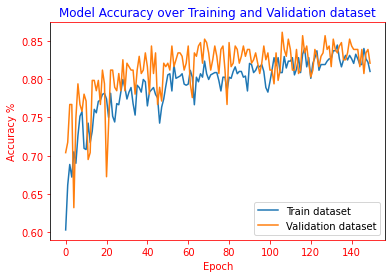

In [8]:
## data

titanic_df = pd.read_csv( 'datasets/titanic_all_numeric.csv' ); titanic_df.columns
X = np.array( titanic_df.drop( ['survived'], axis= 1 ), dtype= 'float32' )
# converting Y survived/not-survived into one hot encoder
Y = keras.utils.to_categorical( titanic_df[['survived']], dtype= 'float32' )


## modeling
tf.keras.backend.clear_session()
kSeqModel1 = keras.Sequential()
kSeqModel1.add(  Dense( 100, activation= 'relu', input_shape= (X.shape[1],) )  )
kSeqModel1.add(  Dense( 100, activation= 'relu' )  )
kSeqModel1.add(  Dense( 2, activation= 'softmax' )  )

# compile model
kSeqModel1.compile( optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'] )

# fit the model
print(' Model is learning.... ')
kSeqModel1_history = kSeqModel1.fit( x= X, y= Y, validation_split= 25./100, epochs= 150, verbose= 2 )
print('\n\n Learning Complete!')

# print Train data Accuracy and Validation data accuracy
my_plot = plt.figure()
ax = my_plot.add_subplot(111)

plt.plot( kSeqModel1_history.history['accuracy'] )
plt.plot( kSeqModel1_history.history['val_accuracy'] )

ax.set_xlabel('Epoch');  ax.set_ylabel('Accuracy %')

ax.spines['bottom'].set_color('red'); ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('red'); ax.yaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red'); ax.tick_params(axis='y', colors='red')


plt.title( 'Model Accuracy over Training and Validation dataset' , color ='blue' )

plt.legend( ['Train dataset', 'Validation dataset'], loc= 'lower right' )
plt.show()

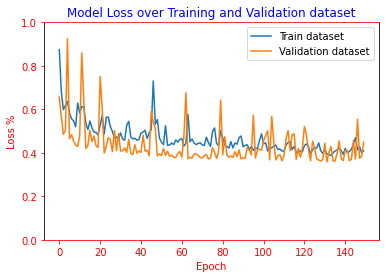

In [9]:
# print Train data Error and Validation data Error
my_plot = plt.figure()
ax = my_plot.add_subplot(111)

plt.plot( kSeqModel1_history.history['loss'] )
plt.plot( kSeqModel1_history.history['val_loss'] )

ax.set_xlabel('Epoch');  ax.set_ylabel('Loss %')

ax.spines['bottom'].set_color('red'); ax.spines['top'].set_color('red')

ax.xaxis.label.set_color('red'); ax.yaxis.label.set_color('red')

ax.tick_params(axis='x', colors='red'); ax.tick_params(axis='y', colors='red')

plt.ylim( [0.0,1.0] )

plt.title( 'Model Loss over Training and Validation dataset' , color ='blue' )

plt.legend( ['Train dataset', 'Validation dataset'], loc= 'upper right' )
plt.show()

<h3>Building model as a function</h3>

In [10]:
def model_arch(X_shp):
    keras.backend.clear_session()
    kSeqModel = keras.Sequential()
    
    kSeqModel.add(  Dense( units= 500, activation= 'relu', input_shape= X_shp )  )
    kSeqModel.add(  Dense( 500, 'relu')  )
    kSeqModel.add(  Dense( 500, 'relu')  )
    kSeqModel.add(  Dense( 2, 'softmax' )  )
    
    return(kSeqModel)

# use the defined model arch

kSeqModel_current = model_arch( (X.shape[1],) )
# define model opt
kSeqModel_optmzr = keras.optimizers.Adam( lr= 0.000001 )
# model complie
kSeqModel_current.compile( optimizer= kSeqModel_optmzr,
                           loss= 'categorical_crossentropy',
                           metrics= ['accuracy'] )
# fit the model
kSeqModel_fit = kSeqModel_current.fit( x= X, y= Y, validation_split= 25./100, epochs= 20, verbose=2  )

    

Epoch 1/20
21/21 - 0s - loss: 1.2223 - accuracy: 0.3907 - val_loss: 0.9803 - val_accuracy: 0.4260
Epoch 2/20
21/21 - 0s - loss: 1.1123 - accuracy: 0.4775 - val_loss: 0.8897 - val_accuracy: 0.5695
Epoch 3/20
21/21 - 0s - loss: 1.0184 - accuracy: 0.5823 - val_loss: 0.8154 - val_accuracy: 0.6637
Epoch 4/20
21/21 - 0s - loss: 0.9385 - accuracy: 0.6272 - val_loss: 0.7563 - val_accuracy: 0.6771
Epoch 5/20
21/21 - 0s - loss: 0.8748 - accuracy: 0.6512 - val_loss: 0.7067 - val_accuracy: 0.7085
Epoch 6/20
21/21 - 0s - loss: 0.8222 - accuracy: 0.6632 - val_loss: 0.6662 - val_accuracy: 0.7220
Epoch 7/20
21/21 - 0s - loss: 0.7769 - accuracy: 0.6707 - val_loss: 0.6373 - val_accuracy: 0.7220
Epoch 8/20
21/21 - 0s - loss: 0.7430 - accuracy: 0.6677 - val_loss: 0.6133 - val_accuracy: 0.7220
Epoch 9/20
21/21 - 0s - loss: 0.7126 - accuracy: 0.6811 - val_loss: 0.5960 - val_accuracy: 0.7040
Epoch 10/20
21/21 - 0s - loss: 0.6890 - accuracy: 0.6841 - val_loss: 0.5834 - val_accuracy: 0.7175
Epoch 11/20
21/21 -

### Early stopping: Optimizing the optimization

In [14]:
## data
titanic_df = pd.read_csv( 'datasets/titanic_all_numeric.csv' ); titanic_df.columns
X = np.array( titanic_df.drop( ['survived'], axis= 1 ), dtype= 'float32' )
# converting Y survived/not-survived into one hot encoder
Y = keras.utils.to_categorical( titanic_df[['survived']], dtype= 'float32' )

## model arch
keras.backend.clear_session()
kSeqModel_1 = keras.Sequential()
kSeqModel_1.add(  Dense( units= 100, activation= 'relu', input_shape= (X.shape[1],) )  )
kSeqModel_1.add(  Dense( 100, 'relu')  )
kSeqModel_1.add(  Dense( 2, 'softmax' )  )

# model compile
kSeqModel_1.compile( optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'] )

Epoch 1/10000
21/21 - 0s - loss: 0.7147 - accuracy: 0.6287 - val_loss: 0.6287 - val_accuracy: 0.6547
Epoch 2/10000
21/21 - 0s - loss: 0.6200 - accuracy: 0.6826 - val_loss: 0.5174 - val_accuracy: 0.7085
Epoch 3/10000
21/21 - 0s - loss: 0.6366 - accuracy: 0.6886 - val_loss: 0.5889 - val_accuracy: 0.7175
Epoch 4/10000
21/21 - 0s - loss: 0.6751 - accuracy: 0.6811 - val_loss: 0.5260 - val_accuracy: 0.7309
Epoch 5/10000
21/21 - 0s - loss: 0.6445 - accuracy: 0.6722 - val_loss: 0.6183 - val_accuracy: 0.7130
Epoch 6/10000
21/21 - 0s - loss: 0.7019 - accuracy: 0.6976 - val_loss: 0.4935 - val_accuracy: 0.7623
Epoch 7/10000
21/21 - 0s - loss: 0.6324 - accuracy: 0.6871 - val_loss: 0.4983 - val_accuracy: 0.7758
Epoch 8/10000
21/21 - 0s - loss: 0.5559 - accuracy: 0.7111 - val_loss: 0.4592 - val_accuracy: 0.7668
Epoch 9/10000
21/21 - 0s - loss: 0.5822 - accuracy: 0.7231 - val_loss: 0.7313 - val_accuracy: 0.6682
Epoch 10/10000
21/21 - 0s - loss: 0.5991 - accuracy: 0.7021 - val_loss: 0.6011 - val_accura

Epoch 82/10000
21/21 - 0s - loss: 0.4241 - accuracy: 0.8084 - val_loss: 0.3696 - val_accuracy: 0.8386
Epoch 83/10000
21/21 - 0s - loss: 0.4238 - accuracy: 0.8144 - val_loss: 0.3641 - val_accuracy: 0.8296
Epoch 84/10000
21/21 - 0s - loss: 0.4239 - accuracy: 0.8099 - val_loss: 0.3705 - val_accuracy: 0.8251
Epoch 85/10000
21/21 - 0s - loss: 0.4237 - accuracy: 0.8263 - val_loss: 0.3896 - val_accuracy: 0.8386
Epoch 86/10000
21/21 - 0s - loss: 0.4339 - accuracy: 0.8054 - val_loss: 0.3676 - val_accuracy: 0.8386
Epoch 87/10000
21/21 - 0s - loss: 0.4381 - accuracy: 0.8263 - val_loss: 0.3699 - val_accuracy: 0.8386
Epoch 88/10000
21/21 - 0s - loss: 0.4229 - accuracy: 0.8084 - val_loss: 0.3631 - val_accuracy: 0.8430
Epoch 89/10000
21/21 - 0s - loss: 0.4178 - accuracy: 0.8249 - val_loss: 0.3741 - val_accuracy: 0.8341
Epoch 90/10000
21/21 - 0s - loss: 0.4218 - accuracy: 0.8114 - val_loss: 0.3897 - val_accuracy: 0.8251
Epoch 91/10000
21/21 - 0s - loss: 0.4247 - accuracy: 0.8069 - val_loss: 0.4761 - v

Epoch 162/10000
21/21 - 0s - loss: 0.3931 - accuracy: 0.8144 - val_loss: 0.3743 - val_accuracy: 0.8251
Epoch 163/10000
21/21 - 0s - loss: 0.3862 - accuracy: 0.8368 - val_loss: 0.3906 - val_accuracy: 0.8296
Epoch 164/10000
21/21 - 0s - loss: 0.3765 - accuracy: 0.8323 - val_loss: 0.3755 - val_accuracy: 0.8072
Epoch 165/10000
21/21 - 0s - loss: 0.3840 - accuracy: 0.8368 - val_loss: 0.3778 - val_accuracy: 0.8206
Epoch 166/10000
21/21 - 0s - loss: 0.3790 - accuracy: 0.8473 - val_loss: 0.4274 - val_accuracy: 0.8161
Epoch 167/10000
21/21 - 0s - loss: 0.3910 - accuracy: 0.8249 - val_loss: 0.3711 - val_accuracy: 0.8161
Epoch 168/10000
21/21 - 0s - loss: 0.3812 - accuracy: 0.8548 - val_loss: 0.3816 - val_accuracy: 0.8251
Epoch 169/10000
21/21 - 0s - loss: 0.3871 - accuracy: 0.8308 - val_loss: 0.3697 - val_accuracy: 0.8072
Epoch 170/10000
21/21 - 0s - loss: 0.3844 - accuracy: 0.8413 - val_loss: 0.3874 - val_accuracy: 0.8027
Epoch 171/10000
21/21 - 0s - loss: 0.3817 - accuracy: 0.8323 - val_loss: 

Epoch 242/10000
21/21 - 0s - loss: 0.3534 - accuracy: 0.8578 - val_loss: 0.4330 - val_accuracy: 0.8161
Epoch 243/10000
21/21 - 0s - loss: 0.3394 - accuracy: 0.8518 - val_loss: 0.4401 - val_accuracy: 0.8072
Epoch 244/10000
21/21 - 0s - loss: 0.3581 - accuracy: 0.8458 - val_loss: 0.3991 - val_accuracy: 0.8161
Epoch 245/10000
21/21 - 0s - loss: 0.3455 - accuracy: 0.8473 - val_loss: 0.3973 - val_accuracy: 0.8251
Epoch 246/10000
21/21 - 0s - loss: 0.3490 - accuracy: 0.8608 - val_loss: 0.4896 - val_accuracy: 0.7937
Epoch 247/10000
21/21 - 0s - loss: 0.3581 - accuracy: 0.8473 - val_loss: 0.5045 - val_accuracy: 0.7982
Epoch 248/10000
21/21 - 0s - loss: 0.3618 - accuracy: 0.8518 - val_loss: 0.4579 - val_accuracy: 0.8027
Epoch 249/10000
21/21 - 0s - loss: 0.3668 - accuracy: 0.8338 - val_loss: 0.4226 - val_accuracy: 0.8206
Epoch 250/10000
21/21 - 0s - loss: 0.3760 - accuracy: 0.8413 - val_loss: 0.3827 - val_accuracy: 0.8206
Epoch 251/10000
21/21 - 0s - loss: 0.3411 - accuracy: 0.8518 - val_loss: 

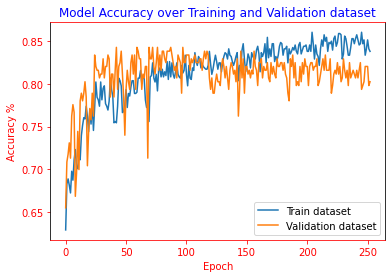

In [15]:
# Early stopping mechanism

e_stop_obj = keras.callbacks.EarlyStopping( patience= 100 )

kSeqModel1_history= kSeqModel_1.fit( x= X, y= Y,
                                     validation_split= 25./100,
                                     epochs= 10000, verbose= 2,
                                     callbacks= [e_stop_obj]
                                   )

# plot the accuracy

# print Train data Error and Validation data Error
my_plot = plt.figure()
ax = my_plot.add_subplot(111)

plt.plot( kSeqModel1_history.history['accuracy'] )
plt.plot( kSeqModel1_history.history['val_accuracy'] )

ax.set_xlabel('Epoch');  ax.set_ylabel('Accuracy %')

ax.spines['bottom'].set_color('red'); ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('red'); ax.yaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red'); ax.tick_params(axis='y', colors='red')


plt.title( 'Model Accuracy over Training and Validation dataset' , color ='blue' )

plt.legend( ['Train dataset', 'Validation dataset'], loc= 'lower right' )
plt.show()

#### Comparing two models

In [16]:
from tensorflow.keras.callbacks import EarlyStopping 
tf.keras.backend.clear_session()

e_stop_monitor = EarlyStopping(patience= 10)


# model 1


model1 = keras.Sequential()
model1.add( keras.layers.Dense( units= 10, activation= 'relu', input_shape= (X.shape[1],)  )
)
model1.add( keras.layers.Dense( units= 10, activation= 'relu' )
)
model1.add( keras.layers.Dense( units= 2, activation= 'sigmoid' )
)

model1.compile( optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'] )

model1_training = model1.fit( x= X, y= Y, epochs= 15,
                              validation_split = 20./100,
                              callbacks= [e_stop_monitor],
                              verbose= 2
)

Epoch 1/15
23/23 - 0s - loss: 4.8793 - accuracy: 0.3876 - val_loss: 3.5351 - val_accuracy: 0.3184
Epoch 2/15
23/23 - 0s - loss: 2.8583 - accuracy: 0.3792 - val_loss: 2.1500 - val_accuracy: 0.3575
Epoch 3/15
23/23 - 0s - loss: 1.7256 - accuracy: 0.3539 - val_loss: 1.3726 - val_accuracy: 0.3073
Epoch 4/15
23/23 - 0s - loss: 1.1135 - accuracy: 0.4157 - val_loss: 0.8053 - val_accuracy: 0.5475
Epoch 5/15
23/23 - 0s - loss: 0.7935 - accuracy: 0.6222 - val_loss: 0.5926 - val_accuracy: 0.7318
Epoch 6/15
23/23 - 0s - loss: 0.7322 - accuracy: 0.6489 - val_loss: 0.5634 - val_accuracy: 0.7151
Epoch 7/15
23/23 - 0s - loss: 0.7101 - accuracy: 0.6475 - val_loss: 0.5572 - val_accuracy: 0.7207
Epoch 8/15
23/23 - 0s - loss: 0.6948 - accuracy: 0.6447 - val_loss: 0.5513 - val_accuracy: 0.7318
Epoch 9/15
23/23 - 0s - loss: 0.6811 - accuracy: 0.6461 - val_loss: 0.5532 - val_accuracy: 0.7263
Epoch 10/15
23/23 - 0s - loss: 0.6693 - accuracy: 0.6587 - val_loss: 0.5477 - val_accuracy: 0.7318
Epoch 11/15
23/23 -

In [17]:
# model 2
model2 = keras.Sequential()
model2.add( keras.layers.Dense( units= 100, activation= 'relu', input_shape= (X.shape[1],)  )
)
model2.add( keras.layers.Dense( units= 100, activation= 'relu')
)
model2.add( keras.layers.Dense( units= 2, activation= 'softmax' )
)

model2.compile( optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'] )

model2_training = model2.fit( x= X, y= Y,
                              epochs = 15,
                              validation_split = 20.0/100,
                              callbacks= [e_stop_monitor],
                              verbose= 2
)

Epoch 1/15
23/23 - 0s - loss: 0.9493 - accuracy: 0.6320 - val_loss: 0.5490 - val_accuracy: 0.7151
Epoch 2/15
23/23 - 0s - loss: 0.6920 - accuracy: 0.6671 - val_loss: 0.5124 - val_accuracy: 0.7486
Epoch 3/15
23/23 - 0s - loss: 0.6646 - accuracy: 0.6615 - val_loss: 0.4864 - val_accuracy: 0.7542
Epoch 4/15
23/23 - 0s - loss: 0.6615 - accuracy: 0.6643 - val_loss: 0.6567 - val_accuracy: 0.6425
Epoch 5/15
23/23 - 0s - loss: 0.6656 - accuracy: 0.6812 - val_loss: 0.5170 - val_accuracy: 0.7877
Epoch 6/15
23/23 - 0s - loss: 0.5722 - accuracy: 0.6910 - val_loss: 0.4569 - val_accuracy: 0.7654
Epoch 7/15
23/23 - 0s - loss: 0.5936 - accuracy: 0.6854 - val_loss: 0.4401 - val_accuracy: 0.7933
Epoch 8/15
23/23 - 0s - loss: 0.5503 - accuracy: 0.7360 - val_loss: 0.4394 - val_accuracy: 0.7765
Epoch 9/15
23/23 - 0s - loss: 0.5775 - accuracy: 0.7346 - val_loss: 0.4359 - val_accuracy: 0.7989
Epoch 10/15
23/23 - 0s - loss: 0.5428 - accuracy: 0.7430 - val_loss: 0.4444 - val_accuracy: 0.7933
Epoch 11/15
23/23 -

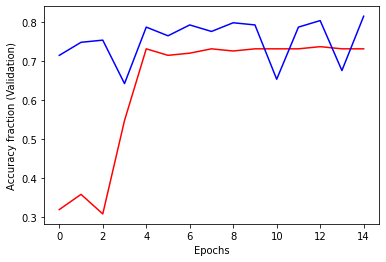

In [18]:
# create the comparison plots
plt.plot( model1_training.history['val_accuracy'], 'r',
          model2_training.history['val_accuracy'], 'b'
)
plt.xlabel('Epochs'); plt.ylabel('Accuracy fraction (Validation)')
plt.show()